# FIT5196 Assessment 2
#### Student Name:Balaji Ippagunta
#### Student ID: 29876451

Date: 19/05/2019

Version: 2.0

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

Libraries used:
* re
* json 
* warnings
* pandas
* matplotlib
* re
* networkx
* datetime
* numpy
* math
* datetime
* time
* import LinearRegression from sklearn.linear_model



## 1. Introduction
This task comprises of Exploratory Data Analysis and wrangling of data. There three tasks involved are cleaning the dirty data and using this cleaned dirty data we will impute the missing values in the Missing Data file. Now we need to remove the outlier from the Outlier file with the help of a model built from Cleaned data and imputed missing data.

Libraries needed to perform all the three tasks:

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import re
import networkx as nx
import datetime
import numpy as np
import math
import datetime, time
from sklearn.linear_model import LinearRegression

# 2.Dirty Data

Reading the files in to the program

In [2]:
dirtyDataDf=pd.read_csv("29876451_dirty_data.csv")
edgesdf=pd.read_csv("edges.csv")
nodesdf=pd.read_csv("nodes.csv")

In [3]:
dirtyDataDf.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,0.773196,5.089347,4.907216,-36.548318,144.932169,-36.540169,144.940279,15426.164605,4020.424399,58.636220
std,0.745170,2.599520,2.554573,9.857538,0.108926,9.848393,0.097682,16148.047812,3888.504497,131.585485
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,41.000000,10.860000,2.600000
25%,0.000000,3.000000,3.000000,-37.824590,144.925579,-37.820387,144.928843,5462.500000,1374.540000,11.785000
50%,1.000000,5.000000,5.000000,-37.814123,144.960401,-37.813762,144.962985,8765.000000,2511.300000,18.830000
75%,1.000000,7.000000,7.000000,-37.805457,144.993768,-37.803184,144.989468,12427.500000,3915.870000,43.320000
max,3.000000,9.000000,9.000000,38.110916,145.046450,37.821510,145.046450,51061.000000,13204.980000,950.070000


#### Checking the Uber Types if there are any disperencies with the help of regular expression and correcting the Uber Type on the basis of RideID

ID1******* is for uber type 0

ID3******* is for uber type 1

ID5******* is for uber type 2

In [4]:
for i in range(0,len(dirtyDataDf['Unnamed: 0'])):
    if re.search(r'ID1.*', dirtyDataDf['Unnamed: 0'][i]):
        if dirtyDataDf['Uber Type'][i]!=0:
            print("Dirty Data UberType:",dirtyDataDf['Uber Type'][i],"ID1.....")
            dirtyDataDf['Uber Type'][i]=0
            print("After Fixing UberType:",dirtyDataDf['Uber Type'][i],"ID1.....")
    elif re.search(r'ID3.*', dirtyDataDf['Unnamed: 0'][i]):
        if dirtyDataDf['Uber Type'][i]!=1:
            print("Dirty Data UberType:",dirtyDataDf['Uber Type'][i],"ID3.....")
            dirtyDataDf['Uber Type'][i]=1
            print("After Fixing UberType:",dirtyDataDf['Uber Type'][i],"ID3.....")
    elif re.search(r'ID5.*', dirtyDataDf['Unnamed: 0'][i]):
        if dirtyDataDf['Uber Type'][i]!=2:
            print("Dirty Data UberType:",dirtyDataDf['Uber Type'][i],"ID5.....")
            dirtyDataDf['Uber Type'][i]=2
            print("After Fixing UberType:",dirtyDataDf['Uber Type'][i],"ID5.....")
    else:
        print(dirtyDataDf['Unnamed: 0'])

Dirty Data UberType: 1 ID1.....
After Fixing UberType: 0 ID1.....
Dirty Data UberType: 3 ID1.....
After Fixing UberType: 0 ID1.....
Dirty Data UberType: 2 ID3.....
After Fixing UberType: 1 ID3.....
Dirty Data UberType: 3 ID3.....
After Fixing UberType: 1 ID3.....
Dirty Data UberType: 3 ID5.....
After Fixing UberType: 2 ID5.....
Dirty Data UberType: 2 ID3.....
After Fixing UberType: 1 ID3.....
Dirty Data UberType: 2 ID1.....
After Fixing UberType: 0 ID1.....


#### Investigating Origin Latitude and Longitude

In [5]:
for i in range(0,len(dirtyDataDf)):
    if dirtyDataDf['Origin Latitude'][i]>0:
        print("Latitude is positive",dirtyDataDf['Origin Latitude'][i])
        dirtyDataDf['Origin Latitude'][i]=-1*dirtyDataDf['Origin Latitude'][i]
        print("After Correcting the data point",dirtyDataDf['Origin Latitude'][i])
    if dirtyDataDf['Destination Latitude'][i]>0:
        print("Latitude is positive",dirtyDataDf['Destination Latitude'][i])
        dirtyDataDf['Destination Latitude'][i]=-1*dirtyDataDf['Destination Latitude'][i]
        print("After Correcting the data point",dirtyDataDf['Destination Latitude'][i])

Latitude is positive 37.8158343
After Correcting the data point -37.8158343
Latitude is positive 38.1109156
After Correcting the data point -38.1109156
Latitude is positive 37.8068126
After Correcting the data point -37.8068126
Latitude is positive 37.8152706
After Correcting the data point -37.8152706
Latitude is positive 37.8166264
After Correcting the data point -37.8166264
Latitude is positive 37.8215102
After Correcting the data point -37.8215102
Latitude is positive 37.8181848
After Correcting the data point -37.8181848
Latitude is positive 37.8056537
After Correcting the data point -37.8056537
Latitude is positive 37.8133599
After Correcting the data point -37.8133599
Latitude is positive 37.805738899999994
After Correcting the data point -37.805738899999994


#### Exploring the Journey Distance(m) data

In [6]:
def nodesExtractor(long,lat):
    for i in range(0,len(nodesdf)):
        if nodesdf['lat'][i]==lat and nodesdf['lon'][i]==long:
            return nodesdf['Unnamed: 0'][i]

G = nx.from_pandas_edgelist(edgesdf, 'u', 'v', ['distance(m)'])
def shortestDistanceCalculator(src,des):
    d, p = nx.single_source_dijkstra(G,source=src, target=des,weight='distance(m)')
    return d
def pathCalculator(src,des):
    paths = nx.all_shortest_paths(G,source=src, target=des,weight='distance(m)')
    p_list = list(paths)
    return p_list
def traveltime(path):
    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edgesdf[((edgesdf.u==path[i]) & (edgesdf.v== path[i+1])) | ((edgesdf.v==path[i]) & (edgesdf.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edgesdf[((edgesdf.u==path[i]) & (edgesdf.v== path[i+1])) | ((edgesdf.v==path[i]) & (edgesdf.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt

#### Analyse if the departure dates are valid or not

In [7]:
Month31=[1,3,5,7,8,10,12]
Month30=[4,6,11]
for i in range(0,len(dirtyDataDf)):
    splittedDate=dirtyDataDf['Departure Date'][i].split('-')
    if int(splittedDate[1])>12:
        splittedDate[2],splittedDate[1]=splittedDate[1],splittedDate[2]
        print("splittedDate[2]:",splittedDate[2],"splittedDate[1]:",splittedDate[1])
    if int(splittedDate[1]) in Month31:
        if int(splittedDate[2])>31:
            print("Found one",splittedDate[2],splittedDate[1])
            splittedDate[2]="31"
    elif int(splittedDate[1]) in Month30:
        if int(splittedDate[2])>30:
            print("Found second",splittedDate[2],splittedDate[1])
            splittedDate[2]="30"
    elif int(splittedDate[1]) is 2:
        if int(splittedDate[2])>28:
            splittedDate[2]="28"
    dirtyDataDf['Departure Date'][i]=splittedDate[0]+'-'+splittedDate[1]+'-'+splittedDate[2]

splittedDate[2]: 15 splittedDate[1]: 05
splittedDate[2]: 16 splittedDate[1]: 07
splittedDate[2]: 21 splittedDate[1]: 03
splittedDate[2]: 16 splittedDate[1]: 02
splittedDate[2]: 15 splittedDate[1]: 02
splittedDate[2]: 25 splittedDate[1]: 05
Found second 31 06
Found second 31 04
Found second 31 04
Found second 31 04
Found second 31 04
Found second 31 04
Found second 31 04
Found second 31 04


#### Analysis of Latitude and longitude co-ordinates,Distance travelled and Time travelled

In [8]:
for i in range(0,len(dirtyDataDf)):
    print("Analysing the",i,"th value")
    src=nodesExtractor(dirtyDataDf['Origin Longitude'][i],dirtyDataDf['Origin Latitude'][i])
    des=nodesExtractor(dirtyDataDf['Destination Longitude'][i],dirtyDataDf['Destination Latitude'][i])
    
    
    if src is None  or des is None:
        print("Checking if we have any dirt coordinates that is with out any node for given latitude and longitude")
        print(src,des)
        print("ID of dirty Co-ordinates",dirtyDataDf['Unnamed: 0'][i])
    
    
    #Calculating the shortest distance between the departure and Arrival nodes
    distance=shortestDistanceCalculator(src,des)
    
    if distance!=dirtyDataDf['Journey Distance(m)'][i]:
        print("------------------Journey Distance(m) Started---------------------")    
        print("For ID",dirtyDataDf['Unnamed: 0'][i],"Given Distance is",dirtyDataDf['Journey Distance(m)'][i],"Calculated distance is:",distance)
        dirtyDataDf['Journey Distance(m)'][i]=distance
        print("Journey Distance is corrected for the above ride")
        print("------------------Journey Distance(m) Ended---------------------")
        
    #Calculating all the paths from the departure node to the arrival node
    paths=pathCalculator(src,des)
    traveltimeList=[]
    for pathele in paths:
        #print(pathele)
        traveltime1=traveltime(pathele)
        traveltimeList.append(round(traveltime1,0))
    #print("Paths acquired")
    #Verifying the validity of travel time
    if round(dirtyDataDf['Travel Time(s)'][i],0) not in traveltimeList:
        print("Checking of travel time is valid by considering all the paths")
        print("Got one",dirtyDataDf['Unnamed: 0'][i])
        departureDateTimeObject = datetime.datetime.strptime(dirtyDataDf['Departure Date'][i]+' '+dirtyDataDf['Departure Time'][i], '%Y-%m-%d %H:%M:%S')
        arrivalDateTimeObject = datetime.datetime.strptime(dirtyDataDf['Departure Date'][i]+' '+dirtyDataDf['Arrival Time'][i], '%Y-%m-%d %H:%M:%S')
        if departureDateTimeObject>arrivalDateTimeObject:
            arrivalDateTimeObject=arrivalDateTimeObject+datetime.timedelta(days=1)
        newTravelTime=arrivalDateTimeObject-departureDateTimeObject
        dirtyDataDf['Travel Time(s)'][i]=newTravelTime.total_seconds()
        print("Time Travelled has been changed",dirtyDataDf['Travel Time(s)'][i])
        
        
        
print("We dont have any dirty co-ordinates for the given dataset")
print("There were 5 observations for which Journey distance is calculated wrongly")


Analysing the 0 th value
Analysing the 1 th value
------------------Journey Distance(m) Started---------------------
For ID ID1855962424 Given Distance is 3609.5 Calculated distance is: 3602.0
Journey Distance is corrected for the above ride
------------------Journey Distance(m) Ended---------------------
Analysing the 2 th value
Analysing the 3 th value
------------------Journey Distance(m) Started---------------------
For ID ID3272366546 Given Distance is 6881.8 Calculated distance is: 6873.0
Journey Distance is corrected for the above ride
------------------Journey Distance(m) Ended---------------------
Analysing the 4 th value
Analysing the 5 th value
Analysing the 6 th value
Analysing the 7 th value
------------------Journey Distance(m) Started---------------------
For ID ID3828867057 Given Distance is 11416.6 Calculated distance is: 11417.0
Journey Distance is corrected for the above ride
------------------Journey Distance(m) Ended---------------------
Analysing the 8 th value
An

Analysing the 215 th value
Analysing the 216 th value
Analysing the 217 th value
Analysing the 218 th value
Analysing the 219 th value
Analysing the 220 th value
Analysing the 221 th value
Analysing the 222 th value
Analysing the 223 th value
Analysing the 224 th value
Analysing the 225 th value
Analysing the 226 th value
Analysing the 227 th value
Analysing the 228 th value
Analysing the 229 th value
Analysing the 230 th value
Analysing the 231 th value
Analysing the 232 th value
Analysing the 233 th value
Analysing the 234 th value
Analysing the 235 th value
Analysing the 236 th value
Analysing the 237 th value
Analysing the 238 th value
Analysing the 239 th value
Analysing the 240 th value
Analysing the 241 th value
Analysing the 242 th value
Analysing the 243 th value
Analysing the 244 th value
Analysing the 245 th value
Analysing the 246 th value
Analysing the 247 th value
Analysing the 248 th value
Analysing the 249 th value
Analysing the 250 th value
Analysing the 251 th value
A

#### Arrival time analysis which doesn't match with the sum of Departure time and travelling time

In [9]:
for i in range(0,len(dirtyDataDf)):
    departureTimeObject = datetime.datetime.strptime(dirtyDataDf['Departure Time'][i], '%H:%M:%S')
    arrivalTimeObject = departureTimeObject + datetime.timedelta(seconds=dirtyDataDf['Travel Time(s)'][i])
    arrivalTimeObject = arrivalTimeObject.replace(microsecond=0)
    arrivalTimeObjectStr=str(arrivalTimeObject.time())
    if str(arrivalTimeObject.time())[0]=='0':
        arrivalTimeObjectStr=arrivalTimeObjectStr[1:]
    if dirtyDataDf['Arrival Time'][i]!= arrivalTimeObjectStr:
        dirtyDataDf['Arrival Time'][i]=arrivalTimeObjectStr
        print("Arrival time changed for",dirtyDataDf['Unnamed: 0'][i])


Arrival time changed for ID1944846357
Arrival time changed for ID3776812962
Arrival time changed for ID3640636851
Arrival time changed for ID3150148963
Arrival time changed for ID3887816523
Arrival time changed for ID3613048866
Arrival time changed for ID1932843582
Arrival time changed for ID5947294591
Arrival time changed for ID5467315653
Arrival time changed for ID5870223533
Arrival time changed for ID1390204070
Arrival time changed for ID1171749226
Arrival time changed for ID1834407074
Arrival time changed for ID1899998290
Arrival time changed for ID5384122935
Arrival time changed for ID1389645472
Arrival time changed for ID1411891544
Arrival time changed for ID3358070796
Arrival time changed for ID3753093156
Arrival time changed for ID1543484935


#### Regions

In [10]:
def distance_calc(lat1,lon1,lat2,lon2):
    R = 6378
    dlon = math.radians(lon2 - lon1)
    dlat = math.radians(lat2 - lat1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return round(distance, 3)
def check_region(latitude, longitude,regions):
    distance_dict = {}
    for key, value in regions.items():
        lat2 = value[0]
        lon2 = value[1]
        distance_dict[key] = distance_calc(latitude,longitude,lat2,lon2)
    region_val = min(distance_dict.items(), key=lambda x: x[1]) 
    return region_val[0]

##### Median Latitude and Longitude for the Arrival and Destination Region

In [11]:
medianLatDestination=dirtyDataDf['Destination Latitude'].median()
medianLongDestination=dirtyDataDf['Destination Longitude'].median()
medianLatOrigin=dirtyDataDf['Origin Latitude'].median()
medianLongOrigin=dirtyDataDf['Origin Longitude'].median()
print(medianLatDestination,medianLongDestination,medianLatOrigin,medianLongOrigin)

-37.813993200000006 144.9629847 -37.8146922 144.9604015


Converting the origin and Destination region individual latitudes into dictionaries with distance between them

In [12]:
originLatLongdict={}
for i in range(len(dirtyDataDf)):
    lat=dirtyDataDf['Origin Latitude'][i]
    long=dirtyDataDf['Origin Longitude'][i]
    dist=distance_calc(lat,long,medianLatOrigin,medianLongOrigin)
    originLatLongdict[(lat,long)]=dist
    #print(originLatLongdict)
originLatLongdict=sorted(originLatLongdict.items(), key=lambda x: x[1])
#print(originLatLongdict)

destLatLongdict={}
for i in range(len(dirtyDataDf)):
    lat=dirtyDataDf['Destination Latitude'][i]
    long=dirtyDataDf['Destination Longitude'][i]
    dist=distance_calc(lat,long,medianLatDestination,medianLongDestination)
    destLatLongdict[(lat,long)]=dist
    #print(originLatLongdict)
destLatLongdict=sorted(destLatLongdict.items(), key=lambda x: x[1])
    

Calculating median distance grouped by region to find the median centroid of the groups

In [13]:
medianOriginLatRegion=dirtyDataDf.groupby(dirtyDataDf['Origin Region'])['Origin Latitude'].median()
medianOriginLongRegion=dirtyDataDf.groupby(dirtyDataDf['Origin Region'])['Origin Longitude'].median()
regionLatlong=list(zip(medianOriginLatRegion,medianOriginLongRegion))
i=0
regionDict={}
for ele in regionLatlong:
    i+=1
    regionDict[i]=ele
#regionDict

medianDestLatRegion=dirtyDataDf.groupby(dirtyDataDf['Destination Region'])['Destination Latitude'].median()
medianDestLongRegion=dirtyDataDf.groupby(dirtyDataDf['Destination Region'])['Destination Longitude'].median()
destregionLatlong=list(zip(medianDestLatRegion,medianDestLongRegion))
i=0
destregionDict={}
for ele in destregionLatlong:
    i+=1
    destregionDict[i]=ele

Correcting the regions by calcualting the nearest point to the lat,long co-ordinates

In [14]:
originRegionCorrectDict={1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
destinationRegionCorrectDict={1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
for latLong,dist in originLatLongdict:
    region=check_region(latLong[0],latLong[1],regionDict)
    originRegionCorrectDict[region].append(latLong)
for latLong,dist in destLatLongdict:
    region=check_region(latLong[0],latLong[1],destregionDict)
    destinationRegionCorrectDict[region].append(latLong)


Saving the changes to the data frame

In [15]:

for i in range(len(dirtyDataDf)):
    for region,valuelist in originRegionCorrectDict.items():
        for value in valuelist:
            if dirtyDataDf['Origin Latitude'][i]==value[0] and dirtyDataDf['Origin Longitude'][i]==value[1]:
                if region != dirtyDataDf['Origin Region'][i]:
                    print("Origin Wrong Region, Calculated:",region,"Given:",dirtyDataDf['Origin Region'][i])
                    dirtyDataDf['Origin Region'][i]=region
    for region,valuelist in destinationRegionCorrectDict.items():
        for value in valuelist:
            if dirtyDataDf['Destination Latitude'][i]==value[0] and dirtyDataDf['Destination Longitude'][i]==value[1]:
                if region != dirtyDataDf['Destination Region'][i]:
                    print("Destination Wrong Region, Calculated:",region,"Given:",dirtyDataDf['Destination Region'][i])
                    dirtyDataDf['Destination Region'][i]=region


Destination Wrong Region, Calculated: 5 Given: 2
Origin Wrong Region, Calculated: 4 Given: 3
Destination Wrong Region, Calculated: 2 Given: 5
Origin Wrong Region, Calculated: 1 Given: 3
Origin Wrong Region, Calculated: 5 Given: 1
Origin Wrong Region, Calculated: 9 Given: 8
Origin Wrong Region, Calculated: 7 Given: 3
Origin Wrong Region, Calculated: 4 Given: 5
Origin Wrong Region, Calculated: 1 Given: 6
Origin Wrong Region, Calculated: 9 Given: 1
Destination Wrong Region, Calculated: 2 Given: 5
Destination Wrong Region, Calculated: 2 Given: 8
Destination Wrong Region, Calculated: 5 Given: 8
Destination Wrong Region, Calculated: 7 Given: 2
Destination Wrong Region, Calculated: 7 Given: 8
Origin Wrong Region, Calculated: 2 Given: 1
Destination Wrong Region, Calculated: 3 Given: 2
Origin Wrong Region, Calculated: 5 Given: 2
Origin Wrong Region, Calculated: 5 Given: 1
Origin Wrong Region, Calculated: 3 Given: 1
Origin Wrong Region, Calculated: 2 Given: 5
Origin Wrong Region, Calculated: 4 G

Plotting the co-ordinates using matplotlib

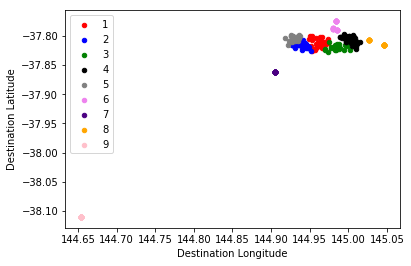

In [16]:
fig, ax = plt.subplots()
colors = {1:'red', 2:'blue', 3:'green', 4:'black', 5:'grey', 6:'violet', 7:'indigo', 8:'orange', 9:'pink'}
grouped = dirtyDataDf.groupby('Destination Region')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Destination Longitude', y='Destination Latitude', label=key, color=colors[key])

plt.show()


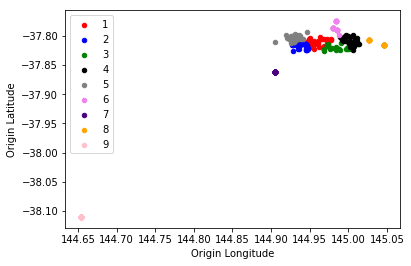

In [17]:
fig, ax = plt.subplots()
colors = {1:'red', 2:'blue', 3:'green', 4:'black', 5:'grey', 6:'violet', 7:'indigo', 8:'orange', 9:'pink'}
grouped = dirtyDataDf.groupby('Origin Region')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Origin Longitude', y='Origin Latitude', label=key, color=colors[key])

plt.show()

#### Saving the final dataframe to the output

In [18]:
dirtyDataDf.to_csv('29876451_dirty_data_solution.csv',index=False)

----------------------------------------------------------------------------------------------------------------------------

# 3 Missing Data

Reading the values into the program

In [19]:
missingdf=pd.read_csv("29876451_missing_value.csv")
missingdf.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,106.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,108.000000
mean,0.679245,4.376000,4.952000,-37.837535,144.939284,-37.833389,144.946110,13236.712000,3454.269120,34.796574
std,0.697576,2.684075,2.235549,0.087030,0.096032,0.080514,0.089669,14516.063916,3480.467002,49.494955
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,1636.000000,405.240000,3.310000
25%,0.000000,2.000000,3.000000,-37.817850,144.930312,-37.819622,144.931335,4901.000000,1230.180000,13.477500
50%,1.000000,4.000000,5.000000,-37.814157,144.957756,-37.811281,144.980377,7783.000000,2041.980000,19.855000
75%,1.000000,6.000000,7.000000,-37.806118,144.983689,-37.801718,144.997907,11550.000000,3620.760000,27.637500
max,2.000000,9.000000,9.000000,-37.773803,145.046450,-37.773803,145.046450,51061.000000,12976.500000,321.910000


In [20]:
missingdf.isna().sum()

Unnamed: 0                0
Uber Type                19
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance(m)       0
Departure Date            0
Departure Time            0
Travel Time(s)            0
Arrival Time              0
Fare$                    17
dtype: int64

There are 19 missing values for Uber Type and 17 missing values for Fare$

#### Imputing the missing values for Uber Type

In [21]:
for i in range(0,len(missingdf['Unnamed: 0'])):
    if re.search(r'ID1.*', missingdf['Unnamed: 0'][i]):
        if missingdf['Uber Type'][i]!=0:
            missingdf['Uber Type'][i]=0
            print("For ID ",missingdf['Unnamed: 0'][i],missingdf['Uber Type'][i])
    elif re.search(r'ID3.*', missingdf['Unnamed: 0'][i]):
        if missingdf['Uber Type'][i]!=1:
            missingdf['Uber Type'][i]=1
            print("For ID ",missingdf['Unnamed: 0'][i],missingdf['Uber Type'][i])
    elif re.search(r'ID5.*', missingdf['Unnamed: 0'][i]):
        if missingdf['Uber Type'][i]!=2:
            missingdf['Uber Type'][i]=2
            print("For ID ",missingdf['Unnamed: 0'][i],missingdf['Uber Type'][i])
    else:
        print(missingdf['Unnamed: 0'])

For ID  ID3953769466 1.0
For ID  ID1115941830 0.0
For ID  ID3113579163 1.0
For ID  ID1438263170 0.0
For ID  ID1480819070 0.0
For ID  ID1274412777 0.0
For ID  ID1222249553 0.0
For ID  ID3815164629 1.0
For ID  ID1635836705 0.0
For ID  ID1650211539 0.0
For ID  ID3254808900 1.0
For ID  ID1458508440 0.0
For ID  ID3589583564 1.0
For ID  ID3650996324 1.0
For ID  ID3527961512 1.0
For ID  ID3785280043 1.0
For ID  ID1334258149 0.0
For ID  ID5962369879 2.0
For ID  ID1500835836 0.0


Appending the cleaned dirty data frame to the missing value data frame for generating a better linear regression model

In [22]:
df3=missingdf.append(dirtyDataDf, ignore_index=True)

In [23]:
def CreateDayCodeAndTimeCode(df):
    
    df['Week Day']=((pd.DatetimeIndex(df['Departure Date']).dayofweek) // 5 == 1).astype(int)

    zeroCode=[6,7,8,9,10,11]
    oneCode=[12,13,14,15,16,17,18,19,20]
    twoCode=[21,22,23,0,1,2,3,4,5]
    ddtlist2=[]
    for i in range(0,len(df)):
        hourVar=pd.to_datetime(df['Departure Time'][i]).hour
        if hourVar in zeroCode:
            deptimecode=0
        elif hourVar in oneCode:
            deptimecode=1
        elif hourVar in twoCode:
            deptimecode=2
        else:
            print("hourVar:",hourVar)
        ddtlist2.append(deptimecode)
    print(len(ddtlist2))
    df['DepartureTimeCode']= ddtlist2



In [24]:
#Function to eliminate unwanted columns from the Train and Test Trains
def DeleteUnwantedColumns(df):
    del df['Departure Date']
    del df['Departure Time']
    del df['Arrival Time']
    del df['Origin Latitude']
    del df['Destination Latitude']
    del df['Destination Longitude']
    del df['Origin Longitude']
    del df['Destination Region']
    del df['Origin Region']

In [25]:
CreateDayCodeAndTimeCode(df3)

DeleteUnwantedColumns(df3)

ubertypeZeroPredictDfTrain=df3[df3['Uber Type']==0]
ubertypeOnePredictDfTrain=df3[df3['Uber Type']==1]
ubertypeTwoPredictDfTrain=df3[df3['Uber Type']==2]

ubertypeZeroPredictDfTest=ubertypeZeroPredictDfTrain[ubertypeZeroPredictDfTrain['Fare$'].isna()]
ubertypeOnePredictDfTest=ubertypeOnePredictDfTrain[ubertypeOnePredictDfTrain['Fare$'].isna()]
ubertypeTwoPredictDfTest=ubertypeTwoPredictDfTrain[ubertypeTwoPredictDfTrain['Fare$'].isna()]

ubertypeZeroPredictDfidlist=ubertypeZeroPredictDfTest['Unnamed: 0']
ubertypeOnePredictDfidlist=ubertypeOnePredictDfTest['Unnamed: 0']
ubertypeTwoPredictDfidlist=ubertypeTwoPredictDfTest['Unnamed: 0']

ubertypeZeroPredictDfTrain.dropna(subset=['Fare$'],axis=0,inplace=True)
ubertypeOnePredictDfTrain.dropna(subset=['Fare$'],axis=0,inplace=True)
ubertypeTwoPredictDfTrain.dropna(subset=['Fare$'],axis=0,inplace=True)

del ubertypeZeroPredictDfTrain['Unnamed: 0']
del ubertypeOnePredictDfTrain['Unnamed: 0']
del ubertypeTwoPredictDfTrain['Unnamed: 0']

del ubertypeZeroPredictDfTest['Unnamed: 0']
del ubertypeOnePredictDfTest['Unnamed: 0']
del ubertypeTwoPredictDfTest['Unnamed: 0']


lm_for_imputetypezero = LinearRegression() #instatiate
lm_for_imputetypezero.fit(ubertypeZeroPredictDfTrain[[x for x in ubertypeZeroPredictDfTrain.columns if x != 'Fare$']],ubertypeZeroPredictDfTrain['Fare$']) #fit
lm_for_imputetypezero1=lm_for_imputetypezero.predict(ubertypeZeroPredictDfTest.drop(['Fare$'],axis=1))

lm_for_imputetypeOne = LinearRegression() #instatiate
lm_for_imputetypeOne.fit(ubertypeOnePredictDfTrain[[x for x in ubertypeOnePredictDfTrain.columns if x != 'Fare$']],ubertypeOnePredictDfTrain['Fare$']) #fit
lm_for_imputetypeOne1=lm_for_imputetypeOne.predict(ubertypeOnePredictDfTest.drop(['Fare$'],axis=1))

lm_for_imputetypeTwo = LinearRegression() #instatiate
lm_for_imputetypeTwo.fit(ubertypeTwoPredictDfTrain[[x for x in ubertypeTwoPredictDfTrain.columns if x != 'Fare$']],ubertypeTwoPredictDfTrain['Fare$']) #fit
lm_for_imputetypeTwo1=lm_for_imputetypeTwo.predict(ubertypeTwoPredictDfTest.drop(['Fare$'],axis=1))

416


In [26]:
lm_for_imputetypezero1
lm_for_imputetypeOne1
lm_for_imputetypeTwo1
idfaretupleZero=list(zip(ubertypeZeroPredictDfidlist,lm_for_imputetypezero1))
idfaretupleOne=list(zip(ubertypeOnePredictDfidlist,lm_for_imputetypeOne1))
idfaretupleTwo=list(zip(ubertypeTwoPredictDfidlist,lm_for_imputetypeTwo1))
finalmissingfarelist=[]
finalmissingfarelist=idfaretupleZero+idfaretupleOne+idfaretupleTwo

In [27]:
print("One",lm_for_imputetypeOne.score(ubertypeOnePredictDfTrain[[x for x in ubertypeOnePredictDfTrain.columns if x != 'Fare$']],ubertypeOnePredictDfTrain['Fare$']))
print("Two",lm_for_imputetypeTwo.score(ubertypeTwoPredictDfTrain[[x for x in ubertypeTwoPredictDfTrain.columns if x != 'Fare$']],ubertypeTwoPredictDfTrain['Fare$']))
print("Zero",lm_for_imputetypezero.score(ubertypeZeroPredictDfTrain[[x for x in ubertypeZeroPredictDfTrain.columns if x != 'Fare$']],ubertypeZeroPredictDfTrain['Fare$']))

One 0.9906831824329845
Two 0.9998839527254454
Zero 0.8540176694467974


In [28]:
for ele in finalmissingfarelist:
    rideid,farevalue=ele
    print(rideid,farevalue)
    missingdf['Fare$'][missingdf[missingdf['Unnamed: 0']==rideid]['Fare$'].index]=farevalue

ID1451620844 11.787135782199167
ID1441313297 10.683517927167358
ID1684150475 22.67284132136489
ID1235335560 9.14952260951763
ID1184444526 9.492711655746868
ID1502936457 30.13522778296707
ID1999141543 16.707140038422526
ID1636456791 6.036318929589241
ID3498735498 12.58513809195847
ID3617014474 14.961653828576388
ID3393718794 10.2608904218528
ID3819619238 19.721469739451205
ID3259062829 13.728064509810997
ID5801412232 219.0269229837068
ID5195186837 231.7459374407616
ID5825597042 878.574451078039
ID5401106141 184.18652666742312


In [29]:
#Checking if there are any missing fares
missingdf[missingdf['Fare$'].isna()]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$


In [30]:
#Checking if there are any missing Uber Type values
missingdf[missingdf['Uber Type'].isna()]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$


Saving the final data frame to the output

In [31]:
missingdf.to_csv('29876451_missing_value_solution.csv',index=False)

----------------------------------------------------------------------------------------------------------------------------

# 4.OutLiers

Reading the data into the program

In [32]:
outlierdf=pd.read_csv("29876451_outliers.csv")
outlierdf.describe()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,52.000000,0.695238,4.733333,5.076190,-37.840980,144.939744,-37.832328,144.950733,13319.323810,3537.179429,68.345238
std,30.454885,0.748380,2.639444,2.506512,0.089816,0.100365,0.072732,0.084910,14552.338738,3537.722762,152.755673
min,0.000000,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,1256.000000,354.720000,3.100000
25%,26.000000,0.000000,3.000000,3.000000,-37.820990,144.931867,-37.824379,144.933267,5043.000000,1311.180000,10.490000
50%,52.000000,1.000000,5.000000,6.000000,-37.813286,144.963780,-37.814753,144.963357,7840.000000,2242.020000,16.410000
75%,78.000000,1.000000,7.000000,7.000000,-37.804770,144.987543,-37.802943,144.988166,11470.000000,3559.020000,27.610000
max,104.000000,2.000000,9.000000,9.000000,-37.773803,145.046450,-37.773803,145.046450,51061.000000,13204.980000,850.320000


Renaming the column names for consistency across missing,dirty and outlier data frames

In [33]:
outlierdf.rename(columns={'Unnamed: 0': 'index_column'}, inplace=True)
outlierdf.rename(columns={'Unnamed: 0.1': 'Unnamed: 0'}, inplace=True)

Appending the missing data frame and cleaned dirty data frame for using it as Training data

In [34]:
combinedDf=missingdf.append(dirtyDataDf, ignore_index=True)

Generating the categorical values for combined data and outlier data for linear regression 

In [35]:
CreateDayCodeAndTimeCode(combinedDf)
CreateDayCodeAndTimeCode(outlierdf)

416
105


In [36]:
DeleteUnwantedColumns(combinedDf)
DeleteUnwantedColumns(outlierdf)
del outlierdf['index_column']

In [37]:
ubertypeZeroPredictDfTrain=combinedDf[combinedDf['Uber Type']==0]
ubertypeOnePredictDfTrain=combinedDf[combinedDf['Uber Type']==1]
ubertypeTwoPredictDfTrain=combinedDf[combinedDf['Uber Type']==2]

ubertypeZeroPredictDfTest=outlierdf[outlierdf['Uber Type']==0]
ubertypeOnePredictDfTest=outlierdf[outlierdf['Uber Type']==1]
ubertypeTwoPredictDfTest=outlierdf[outlierdf['Uber Type']==2]

ubertypeZeroPredictDfidlist=ubertypeZeroPredictDfTest['Unnamed: 0']
ubertypeOnePredictDfidlist=ubertypeOnePredictDfTest['Unnamed: 0']
ubertypeTwoPredictDfidlist=ubertypeTwoPredictDfTest['Unnamed: 0']


del ubertypeZeroPredictDfTrain['Unnamed: 0']
del ubertypeOnePredictDfTrain['Unnamed: 0']
del ubertypeTwoPredictDfTrain['Unnamed: 0']


del ubertypeZeroPredictDfTest['Unnamed: 0']
del ubertypeOnePredictDfTest['Unnamed: 0']
del ubertypeTwoPredictDfTest['Unnamed: 0']



lm_for_imputetypezero = LinearRegression() #instatiate
lm_for_imputetypezero.fit(ubertypeZeroPredictDfTrain[[x for x in ubertypeZeroPredictDfTrain.columns if x != 'Fare$']],ubertypeZeroPredictDfTrain['Fare$']) #fit
lm_for_imputetypezero1=lm_for_imputetypezero.predict(ubertypeZeroPredictDfTest.drop(['Fare$'],axis=1))

lm_for_imputetypeOne = LinearRegression() #instatiate
lm_for_imputetypeOne.fit(ubertypeOnePredictDfTrain[[x for x in ubertypeOnePredictDfTrain.columns if x != 'Fare$']],ubertypeOnePredictDfTrain['Fare$']) #fit
lm_for_imputetypeOne1=lm_for_imputetypeOne.predict(ubertypeOnePredictDfTest.drop(['Fare$'],axis=1))

lm_for_imputetypeTwo = LinearRegression() #instatiate
lm_for_imputetypeTwo.fit(ubertypeTwoPredictDfTrain[[x for x in ubertypeTwoPredictDfTrain.columns if x != 'Fare$']],ubertypeTwoPredictDfTrain['Fare$']) #fit
lm_for_imputetypeTwo1=lm_for_imputetypeTwo.predict(ubertypeTwoPredictDfTest.drop(['Fare$'],axis=1))

In [38]:
print("One",lm_for_imputetypeOne.score(ubertypeOnePredictDfTest[[x for x in ubertypeOnePredictDfTest.columns if x != 'Fare$']],ubertypeOnePredictDfTest['Fare$']))
print("Two",lm_for_imputetypeTwo.score(ubertypeTwoPredictDfTest[[x for x in ubertypeTwoPredictDfTest.columns if x != 'Fare$']],ubertypeTwoPredictDfTest['Fare$']))
print("Zero",lm_for_imputetypezero.score(ubertypeZeroPredictDfTest[[x for x in ubertypeZeroPredictDfTest.columns if x != 'Fare$']],ubertypeZeroPredictDfTest['Fare$']))

One 0.7109781402261962
Two 0.830709972776756
Zero 0.731589663238599


In [39]:
lm_for_imputetypezero1
lm_for_imputetypeOne1
lm_for_imputetypeTwo1
idfaretupleZero=list(zip(ubertypeZeroPredictDfidlist,lm_for_imputetypezero1))
idfaretupleOne=list(zip(ubertypeOnePredictDfidlist,lm_for_imputetypeOne1))
idfaretupleTwo=list(zip(ubertypeTwoPredictDfidlist,lm_for_imputetypeTwo1))
finalmissingfarelist=[]
finalmissingfarelist=idfaretupleZero+idfaretupleOne+idfaretupleTwo
len(finalmissingfarelist)

105

In [40]:
for ele in finalmissingfarelist:
    rideid,farevalue=ele
    print(rideid,farevalue)
    #missingdf.loc[missingdf[missingdf['Unnamed: 0']==rideid],['Fare$']] = farevalue
    #missingdf[missingdf['Unnamed: 0']==rideid]['Fare$']=farevalue
    combinedDf[combinedDf['Unnamed: 0']==rideid]['Predicted Fare$']=farevalue
    #print(missingdf[missingdf['Unnamed: 0']==rideid]['Fare$'].values)

ID1142877786 7.921677902875634
ID1803894738 9.395946896163505
ID1933354462 23.798165381244047
ID1309808734 13.273474777208117
ID1480087683 12.257726453115524
ID1813405393 13.172220237258525
ID1236061867 20.65633304629539
ID1659942420 8.977455937726265
ID1444680825 15.94907536872534
ID1915247434 19.32961104698066
ID1829651594 19.530003320947262
ID1284895574 4.735974105362078
ID1271489431 12.560639714469026
ID1323910078 14.882895752718046
ID1138955155 10.569423182278864
ID1439736052 28.12980630973781
ID1507478540 8.936816758657702
ID1993353164 9.594707418931094
ID1801340676 8.749163655264978
ID1634951859 17.73182928037086
ID1608357228 5.231551912120313
ID1823715665 15.607651513390564
ID1188465574 13.375377045598112
ID1134212467 6.667816093436894
ID1114208825 13.375377045598112
ID1300435250 12.892491189880587
ID1629509324 14.44818127949893
ID1765143277 4.9984682702962475
ID1528553944 13.2655388548291
ID1663031151 26.81871476542186
ID1749910362 12.927901176495551
ID1853943395 12.8890699006

In [41]:
unordereddict={}
for ele in finalmissingfarelist:
    rideid,farevalue=ele
    unordereddict[rideid]=farevalue
unordereddict   
orderedList=[]
for i in range(len(outlierdf)):
    orderedList.append(unordereddict[outlierdf['Unnamed: 0'][i]])

In [42]:
outlierdf['Predicted Fare$']=orderedList

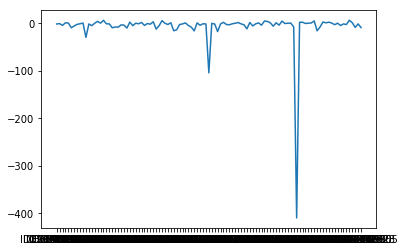

In [43]:
outlierdf['Residual']=outlierdf['Fare$']-outlierdf['Predicted Fare$']
outlierdf
plt.plot(outlierdf['Unnamed: 0'],outlierdf['Residual'])

In [44]:
outlierdf

,Unnamed: 0,Uber Type,Journey Distance(m),Travel Time(s),Fare$,Week Day,DepartureTimeCode,Predicted Fare$,Residual
0,ID3998025420,1,6548.0,1750.38,16.210,0,1,17.646204,-1.436204
1,ID3360964147,1,10222.0,2853.60,20.910,0,1,21.593592,-0.683592
2,ID1142877786,0,1775.0,504.00,3.575,0,1,7.921678,-4.346678
3,ID1803894738,0,7030.0,1772.40,10.490,0,1,9.395947,1.094053
4,ID3220393932,1,9507.0,3147.60,27.250,1,1,26.753806,0.496194
5,ID1933354462,0,47033.0,11350.50,14.350,0,2,23.798165,-9.448165
6,ID1309808734,0,15151.0,4917.48,7.835,0,1,13.273475,-5.438475
7,ID3891145674,1,6386.0,1716.24,20.970,0,2,23.169527,-2.199527
8,ID3606951894,1,6805.0,1760.40,16.710,0,1,17.676051,-0.966051
9,ID1480087683,0,2093.0,523.08,12.770,1,1,12.257726,0.512274


In [46]:
grp0=outlierdf[outlierdf['Uber Type']==0]
grp1=outlierdf[outlierdf['Uber Type']==1]
grp2=outlierdf[outlierdf['Uber Type']==2]

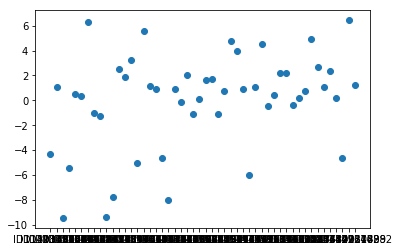

In [54]:
plt.scatter(grp0['Unnamed: 0'],grp0['Residual'])

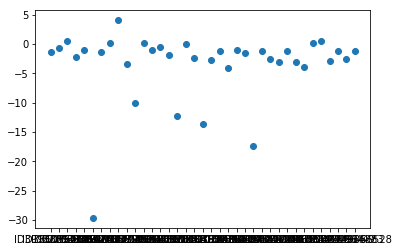

In [56]:
plt.scatter(grp1['Unnamed: 0'],grp1['Residual'])

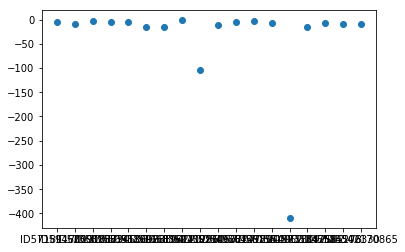

In [55]:
plt.scatter(grp2['Unnamed: 0'],grp2['Residual'])

In [49]:
grp0['Residual'].describe()

count    50.000000
mean      0.009568
std       3.833235
min      -9.448165
25%      -1.057726
50%       0.802704
75%       2.140286
max       6.427545
Name: Residual, dtype: float64

In [62]:
outlierlist=[]
std0=3.833235
std1=6.063987
std2=96.038774
for i in grp2['Residual'].index:
    if abs(grp2['Residual'][i])>(2*std2):
        print(2*std0)
        outlierlist.append(grp2['Unnamed: 0'][i])
        print("grp2['Residual'][i]",grp2['Residual'][i],"grp2['Fare$'][i]",grp2['Fare$'][i],"grp2[Unnamed: 0]",grp2['Unnamed: 0'][i])
for i in grp1['Residual'].index:
    if abs(grp1['Residual'][i])>(2*std1):
        print(2*std0)
        outlierlist.append(grp1['Unnamed: 0'][i])
        print("grp1['Residual'][i]",grp1['Residual'][i],"grp1['Fare$'][i]",grp1['Fare$'][i],"grp1[Unnamed: 0]",grp1['Unnamed: 0'][i])
for i in grp0['Residual'].index:
    if abs(grp0['Residual'][i])>(2*std0):
        print(2*std0)
        outlierlist.append(grp0['Unnamed: 0'][i])
        print("grp0['Residual'][i]",grp0['Residual'][i],"grp0['Fare$'][i]",grp0['Fare$'][i],"grp0[Unnamed: 0]",grp0['Unnamed: 0'][i])



7.66647
grp2['Residual'][i] -409.3171493651697 grp2['Fare$'][i] 396.38 grp2[Unnamed: 0] ID5619758097
7.66647
grp1['Residual'][i] -29.648977886465758 grp1['Fare$'][i] 32.535 grp1[Unnamed: 0] ID3388143666
7.66647
grp1['Residual'][i] -12.219108423076333 grp1['Fare$'][i] 13.01 grp1[Unnamed: 0] ID3268701645
7.66647
grp1['Residual'][i] -13.711357012291979 grp1['Fare$'][i] 10.475 grp1[Unnamed: 0] ID3300769225
7.66647
grp1['Residual'][i] -17.398192915270414 grp1['Fare$'][i] 16.89 grp1[Unnamed: 0] ID3321402410
7.66647
grp0['Residual'][i] -9.448165381244047 grp0['Fare$'][i] 14.35 grp0[Unnamed: 0] ID1933354462
7.66647
grp0['Residual'][i] -9.394611046980659 grp0['Fare$'][i] 9.935 grp0[Unnamed: 0] ID1915247434
7.66647
grp0['Residual'][i] -7.750003320947263 grp0['Fare$'][i] 11.78 grp0[Unnamed: 0] ID1829651594
7.66647
grp0['Residual'][i] -8.01682928037086 grp0['Fare$'][i] 9.715 grp0[Unnamed: 0] ID1634951859


In [83]:
#len(outlierlist)
finaloutlierdf=pd.read_csv("29876451_outliers.csv")
len(finaloutlierdf)

105

In [85]:
for ele in outlierlist:
    finaloutlierdf=finaloutlierdf.drop(finaloutlierdf[finaloutlierdf['Unnamed: 0.1']==ele].index[0])
len(finaloutlierdf)

96

In [86]:
finaloutlierdf.to_csv('29876451_outliers_solution.csv',index=False)